### 구글 코랩에서 한글 문제 해결  
- 아래 코드 설치를 한다.  
- 코랩 런타임 -> 런타임 다시 시작 한다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,777 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and di

# 구글 드라이버 연동

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/colab/dataanalysis

Mounted at /content/drive
/content/drive/MyDrive/colab/dataanalysis


In [3]:
!pwd

/content/drive/MyDrive/colab/dataanalysis


https://www.kaggle.com/c/titanic/data



### 타이타닉 탑승자 데이터
PassengerId: 탑승자 데이터 일련번호     
Survived: 생존여부, 0 = 사망, 1 = 생존   
Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석 
Sex: 탑승자 성별  
Name: 탑승자 이름  
Age: 탑승자 나이  
SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수  
Parch: 같이 탑승한 부모님 또는 자녀 인원 수  
Ticket: 티켓 번호  
Fare: 요금  
Cabin: 선실 번호  
Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic_df = pd.read_csv('./dataset/titanic/train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(1)  데이터  
- 891개의 로우  
- 15개의 칼럼  
- 2개의 float64 타입  
- 4개의 int64 타입  
- 5개의 object 타입(String 타입으로 봐도 무방함)  
- 2개의 category
- 1개의 bool

(2) Null 값   
- age: 177개  
- deck: 608개  
- emarked: 2개  
- emark_town : 2개

In [8]:
titanic_df.describe()
# 숫자로 되어 있는 데이터 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않으므로 Null값을 어떻게 처리할지를 결정해야 한다.

In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) # 널값을 해당되는 나이 컬럼의 평균을 넣어준다.
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(f'데이터 세트 Null 갯수:\n{titanic_df.isnull().sum()}')

데이터 세트 Null 갯수:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


성별에 따른 생존률을 알아보기위해 groupby()와 count()를 사용해보자.
- survived컬럼은 레이블로서 결정 클래스 값이다. 
-  survived 0은 사망, 1은 생존이다. 
- 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많다. 
- 여자는 314명 중 233명으로 약 74.2%가 생존했지만, 남자의 경우는 577명 중 468명이 죽고 109명만 살아남아 약 18.8%가 생존했다.

Cabin 값 추출
- Cabin의 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보이므로 앞 문자만 추출함.

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # str :1은 앞의 글자만 가지고 오는 코드임
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


Sex & Survived
- 성별에 따른 생존률을 알아보기위해 groupby()와 count()  사용

In [11]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

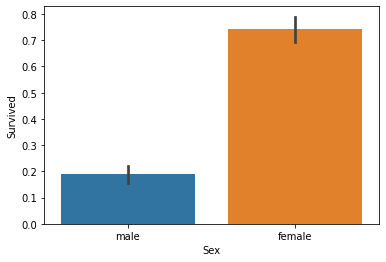

In [12]:
sns.barplot('Sex', 'Survived', data=titanic_df)

객실 등급별 성별에 따른 생존 확률

- 여성의 경우 일등실, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있다.
- 남성의 경우는 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등이 높다.
- 제임스 카메론의 영화인 '타이타닉'에서도 나왔듯이 바다에서 사고가 날 경우 여성과 아이들, 그리고 노약자가 제일 먼저 구조대상이다. 그리고 부자나 유명인이 다음 구조 대상이다. 삼등실에 탄 많은 가난한 이는 타이타닉 호와 운명을 함께 했다.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

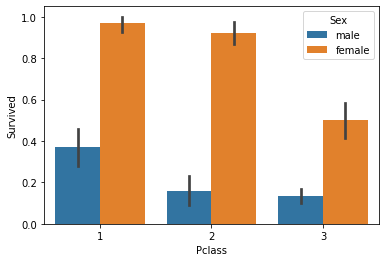

In [13]:
sns.barplot('Pclass', 'Survived', hue='Sex', data=titanic_df)

Age별 생존여부
- pclass가 높은 부자들의 생존률이 더 높고, 남성보다 여성의 생존률이 높은 것을 알 수 있었다.
- age의 경우 값이 너무 다양하기때문에 범위별로 분류해서 카테고리 값을 할당함.
 - Baby = 0~5세
 - Child = 6~12세
 - Teenager = 13~18세
 - Student = 19~25세
 - Young Adult = 26~35세
 - Adult = 36~60세
 - Elderly = 61세 이상
 - Unknown = -1 이하의 오류 값

- 여자 Senior의 경우 매우 생존 확률이 높다.
- 이제까지 분석한 결과 Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


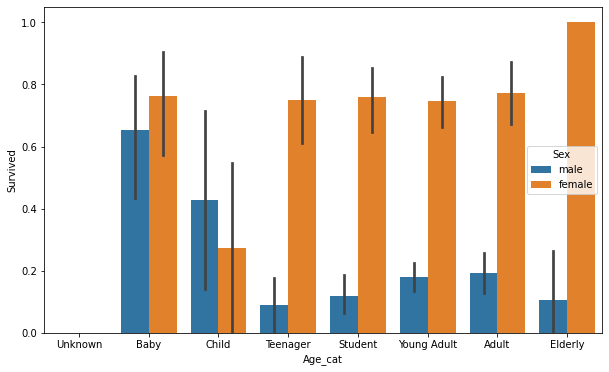

In [ ]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의  apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else: cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']


# lambda 식에 위헤서 설정한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot('Age_cat', 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,N,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,N,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,N,Southampton,no,True


string to number  :  문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

- 사이킷런의 LabelEncoder 클래스를 사용한다.
- LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 - 1)까지의 숫자 값으로 변환한다.

In [16]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


transform function
- 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들어보자. 
- 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null처리, 포매팅, 인코딩을 수행하는 내부함수로 구성하려한다.

In [14]:
# Null 처리 함수
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 불필요한 칼럼 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 내부함수 호출
def transform_features(df):
    df = fill_na(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

사이킷런을 이용한 생존자 예측
- 원본 CSV 파일을 다시 로딩하고 Survived 속성만 별도로 분리해 클래스 결정값 데이터 세트로 만들고 Survived 속성을 드롭해 피처 데이터 세트로 만든다.

In [17]:
titanic_df = pd.read_csv('./dataset/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

결정 트리, 랜덤 포레스트, 로지스틱 회귀(.. 로지스틱 회귀는 분류에 해당됨)
- 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측하려 한다. 로지스틱 회귀는 이름은 회귀지만 실제로는 분류 알고리즘이다.
- 사이킷런 클래스를 이용해 train_test_split( )으로 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측(predict)한다.
- 예측 성능 평가는 정확도로 할 것이며 이를 위해 accuracy_score( ) API를 사용한다.


In [18]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11,)
rf_clf = RandomForestClassifier(random_state=11)

#Increase the number of iterations (max_iter) or scale the data as shown in:
# lr_clf = LogisticRegression()


#사이킷런 0.22 버전에서는 default solver가 'liblinear’ 에서 ‘lbfgs’ 로 변경되면서 이런 warnng 발생
#max_iter=500으로 늘려야 할 것 같음. (적절값 테스트는 반복 변경해 가면서 찾아야 할 것 같습니다.)
lr_clf = LogisticRegression(max_iter=500) # 버전이 업그레이드 되면서 반드시 범위를 지정해야 한다. (max_iter)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


## 교차검증

폴드 세트가 5개인 kfold 객체를 만들고 split하여 학습과 테스트용 인덱스가 만든다

그리고 다시 Classifier 학습, 예측, 정확도를 계산하고 평균 정확도를 계산한다


DecisionTreeClassifier(결정트리)만 kfold를 통해서 검증

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트가 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


cross_val_score( ) API 를 이용해  검증 수행
-  cross_val_score는 StratifiedKFold를 이용해 폴드 세트를 분할한다.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정
- cv는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정한다.
- 최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 train_test_split( )으로 분리된 테스트 데이터 세트에 예측을 수행에 예측 정확도를 출력한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


1. 머신 러닝 지도 학습 프로세스

데이터 전처리->데이터 세트 분리->모델 학습 및 검증 평가->예측 수행->평가

 

2. 데이터 전처리

  -데이터 클린징

  -결손값 처리(Null/NAN 처리)

  -데이터 인코딩(레이블, 원-핫 인코딩)

  -데이터 스케일링

  -이상치 제거

  -Feature 선택, 추출 및 가공

 

3. 데이터 세트 분리

  -학습 데이터/테스트 데이터 분리

 

4. 모델 학습 및 검증 평가

  -알고리즘 학습

  -교차 검증, cross_val_score(), GridSearchCV

 

5. 예측 수행

  -테스트 데이터로 예측 수행

 

6. 평가

  -예측 평가